# Data visualization

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker

In [2]:
path_data = '../data/'

In [3]:
nodes = pd.read_csv(path_data + 'node_information.csv', header=None) # read data in
nodes.columns = ['id', 'year', 'title', 'authors', 'journal', 'abstract'] # change column names (for visibility)

In [4]:
nodes.head()

,id,year,title,authors,journal,abstract
0,1001,2000,compactification geometry and duality,Paul S. Aspinwall,NaN,these are notes based on lectures given at tas...
1,1002,2000,domain walls and massive gauged supergravity p...,"M. Cvetic, H. Lu, C.N. Pope",Class.Quant.Grav.,we point out that massive gauged supergravity ...
2,1003,2000,comment on metric fluctuations in brane worlds,"Y.S. Myung, Gungwon Kang",NaN,recently ivanov and volovich hep-th 9912242 cl...
3,1004,2000,moving mirrors and thermodynamic paradoxes,Adam D. Helfer,Phys.Rev.,quantum fields responding to moving mirrors ha...
4,1005,2000,bundles of chiral blocks and boundary conditio...,"J. Fuchs, C. Schweigert",NaN,proceedings of lie iii clausthal july 1999 var...


In [5]:
nodes.tail()

,id,year,title,authors,journal,abstract
27765,9912289,2002,gauge fixing in the chain by chain method,"A Shirzad, F Loran",NaN,in a recent work we showed that for a hamilton...
27766,9912290,2000,shuffling quantum field theory,Dirk Kreimer,Lett.Math.Phys.,we discuss shuffle identities between feynman ...
27767,9912291,1999,small object limit of casimir effect and the s...,"O. Kenneth, S. Nussinov",Phys.Rev.,we show a simple way of deriving the casimir p...
27768,9912292,1999,1 4 pbgs and superparticle actions,"F.Delduc, E. Ivanov, S. Krivonos",NaN,karpacz poland september 21-25 1999 we constru...
27769,9912293,2000,corrections to the abelian born-infeld action ...,L. Cornalba (I.H.E.S.),JHEP,noncommutative geometry in a recent paper seib...


In [6]:
nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27770 entries, 0 to 27769
Data columns (total 6 columns):
id          27770 non-null int64
year        27770 non-null int64
title       27770 non-null object
authors     23737 non-null object
journal     20298 non-null object
abstract    27770 non-null object
dtypes: int64(2), object(4)
memory usage: 1.3+ MB


In [7]:
nodes = nodes.fillna(0.0) # replace all missing values by 0.0

## Journal titles

In [8]:
journals, counts = np.unique(nodes['journal'].astype(str), return_counts=True) # extract the unique journal titles and its counts
idx = np.argsort(-counts) # sort by decreasing number
journals, counts = journals[idx], counts[idx]

print('Total number of journals: %d' % len(journals))

# get the 10 journals that most papers are published in
for i in range(10):
    print ('\t%s : %d' % (journals[i], counts[i]))

Total number of journals: 285
	0.0 : 7472
	Phys.Lett. : 3575
	Nucl.Phys. : 3571
	Phys.Rev. : 3170
	JHEP : 1957
	Int.J.Mod.Phys. : 938
	Mod.Phys.Lett. : 936
	Class.Quant.Grav. : 556
	J.Phys. : 536
	J.Math.Phys. : 532


From the result, we can see many articles are recorded with unknown journal in which they are published (either they are not yet published, either the data is missing). It appears that all the papers are published in journals that are related to physics (**Phys**).

[]

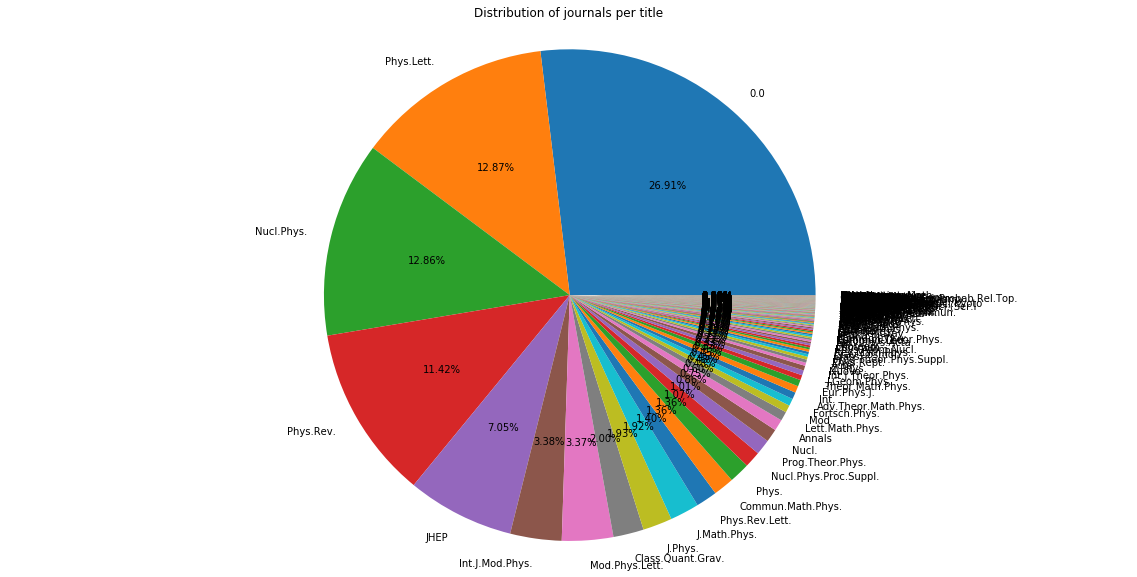

In [9]:
fix, ax = plt.subplots(figsize=(20,10))
ax.set_title('Distribution of journals per title')
ax.pie(counts, labels=journals, autopct='%1.2f%%', shadow=False)
ax.axis('equal')
ax.plot()

The previous pie chart is not visible, because there are too many "noises" (journals that only appear less than t times). We try to plot a more visible plot, by "crashing" all journals that appear less than a threshold (e.g. t = 100) into an arbitrary category named "misc".

[]

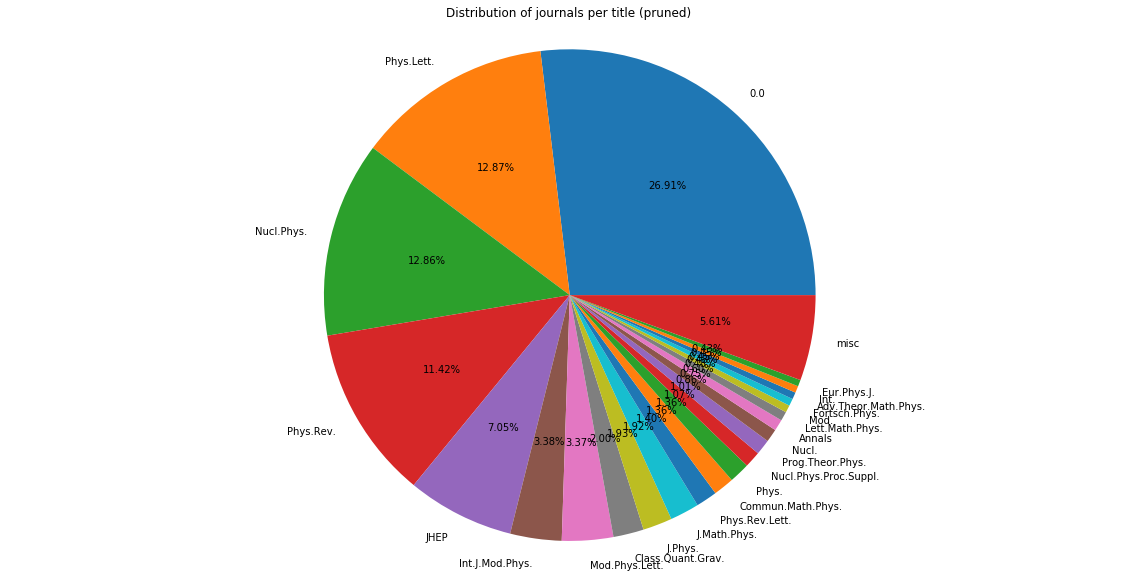

In [10]:
idx_pruned = counts > 100 # get the indices of journals that surpass the threhold t = 100
journals_pr = np.append(journals[idx_pruned], 'misc') # journals that appear less than 100 times are grouped into "misc"
counts_pr = np.append(counts[idx_pruned], sum(counts[~idx_pruned])) # sum up the counts of all articles that appear less than 100 times

fix, ax = plt.subplots(figsize=(20,10))
ax.set_title('Distribution of journals per title (pruned)')
ax.pie(counts_pr, labels=journals_pr, autopct='%1.2f%%', shadow=False)
ax.axis('equal')
ax.plot()

The new plot is now less "noisy" and more visible, as all the infrequent journals are grouped into **misc**. As observed from the pie, more than 25% of the total articles have missing information about the journal, "Phys.Lett", "Nucl.Phys." and "Phys.Rev" have almost equal size.

### Numbers of authors per article

In this part, we try to extract the number of authors of each article and append the analysis to the augmented dataframe.

In [11]:
nodes_aug = nodes # dataframes of all the articles, augmented by analysis result

In [12]:
# count the number of authors per article, then add the information to the dataframe
nb_authors = np.zeros(len(nodes_aug))
i = 0
for authors in nodes_aug['authors']:
    if authors != 0.0:
        authors = [a for a in authors.split(',')] # split by ','
        nb_authors[i] = len(authors)
        i += 1
nodes_aug['nb_authors'] = nb_authors.astype(int) # add the column 'nb_authors' to the dataframe

In [13]:
nodes_aug.head(10)

,id,year,title,authors,journal,abstract,nb_authors
0,1001,2000,compactification geometry and duality,Paul S. Aspinwall,0,these are notes based on lectures given at tas...,1
1,1002,2000,domain walls and massive gauged supergravity p...,"M. Cvetic, H. Lu, C.N. Pope",Class.Quant.Grav.,we point out that massive gauged supergravity ...,3
2,1003,2000,comment on metric fluctuations in brane worlds,"Y.S. Myung, Gungwon Kang",0,recently ivanov and volovich hep-th 9912242 cl...,2
3,1004,2000,moving mirrors and thermodynamic paradoxes,Adam D. Helfer,Phys.Rev.,quantum fields responding to moving mirrors ha...,1
4,1005,2000,bundles of chiral blocks and boundary conditio...,"J. Fuchs, C. Schweigert",0,proceedings of lie iii clausthal july 1999 var...,2
5,1006,2000,questions in quantum physics,Rudolf Haag,0,an assessment of the present status of the the...,1
6,1007,2000,topological defects in 3-d euclidean gravity,"Sheng Li, Yong Zhang, Zhongyuan Zhu",0,by making use of the complete decomposition of...,3
7,1008,2000,n 0 supersymmetry and the non-relativistic mon...,Donald Spector,Phys.Lett.,we study some of the algebraic properties of t...,1
8,1009,2000,gluon pair production from space-time dependen...,"Gouranga C. Nayak, Walter Greiner",0,we compute the probabilty for the processes a ...,2
9,1010,2000,instantons euclidean supersymmetry and wick ro...,"A.V. Belitsky, S. V, oren, P. van Nieuwenhuizen",Phys.Lett.,we discuss the reality properties of the fermi...,4


## Publication per year

In [17]:
papers_per_year = np.array(nodes['year'])

In [20]:
years, counts = np.unique(papers_per_year, return_counts=True)

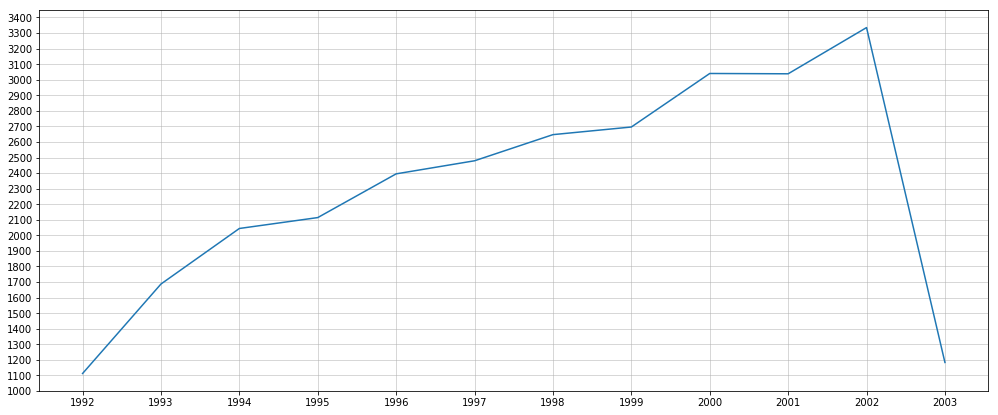

In [47]:
fig, ax = plt.subplots(figsize=(17,7))
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=100))
ax.grid(axis='both', linestyle='-', linewidth=0.5)
ax.plot(years, counts)

In [39]:
papers = zip(years,counts)